# Clase 27 de septiembre de 2021 #

https://docs.scipy.org/doc/scipy/reference/stats.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

## Distribuciones de variables aleatorias discretas ##
**Bernoulli**  
- Parámetros: $ p $
- Soporte: $ {0,1} $ 
- PMF: $ P(X=x)=
\begin{cases}
p & si\;x=1\\
1-p & si\;x=0
\end{cases} $

In [85]:
p = 0.5
mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')
print(mean)
print(var)
print(skew)
print(kurt)

0.5
0.25
0.0
-2.0


**Binomial**  
- Parámetros: $ n, p $
- Soporte: $ {0,1,...,n} $ 
- PMF: $ P(X=x)={n\choose x}p^x (1-p)^{n-x} $

In [24]:
n, p = 5, 0.4
mean, var, skew, kurt = stats.binom.stats(n, p, moments='mvsk')
print('Promedio:', mean)
print('Varianza:', var)
print('Skew:', skew)
print('Curtosis:', kurt)

Promedio: 2.0
Varianza: 1.2
Skew: 0.18257418583505533
Curtosis: -0.3666666666666668


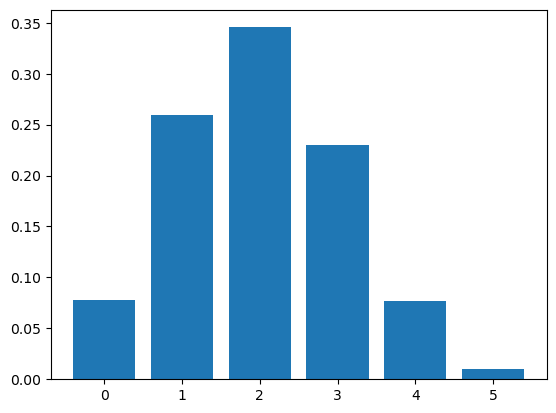

In [19]:
dist_binom = stats.binom(n, p)
x = np.arange(0,6)
y = dist_binom.pmf(x)
plt.bar(x,y)
plt.show()

**Poisson**  
- Parámetros: $ \lambda$
- Soporte: $ {0,1,...,n} $ 
- PMF: $ P(X=x)=\Large{\frac{\lambda^x e^{-\lambda}}{x!}} $

In [25]:
mu = 0.6
mean, var, skew, kurt = stats.poisson.stats(mu, moments='mvsk')
print('Promedio:', mean)
print('Varianza:', var)
print('Skew:', skew)
print('Curtosis:', kurt)

Promedio: 0.6
Varianza: 0.6
Skew: 1.2909944487358056
Curtosis: 1.6666666666666667


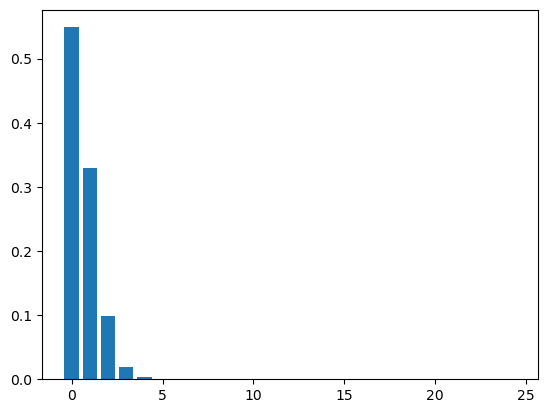

In [26]:
dist_poisson = stats.poisson(mu)
x = np.arange(0,25)
y = dist_poisson.pmf(x)
plt.bar(x,y)
plt.show()

**Ejercicio**  
En análisis de supervivencia, el parámetro $ \lambda $ se puede considerar como una tasa de fallo o en inglés hazard rate, y significa el número promedio de eventos por intervalo.  

Supongamos que tenemos un portafolio de un gran número de bonos. En promedio, cada mes 5 bonos hace default. Si asumimos que la probabilidad de que cualquier bono haga default es independiente de los otros bonos, ¿cuál es la probabilidad de que exactamente dos bonos hagan default en un mes?

## Distribuciones de variables aleatorias continuas ##
**Uniforme**  
- Parámetros: $ \lambda$
- Soporte: $ {0,1,...,n} $ 
- PDF: $ f(x)=
\begin{cases}
\Large\frac{1}{b-a} & x \in [a,b] \\
0 & cualquier\;otro\;caso
\end{cases} $

In [19]:
mean, var, skew, kurt = stats.uniform.stats(moments='mvsk')
print('Promedio:', mean)
print('Varianza:', var)
print('Skew:', skew)
print('Curtosis:', kurt)

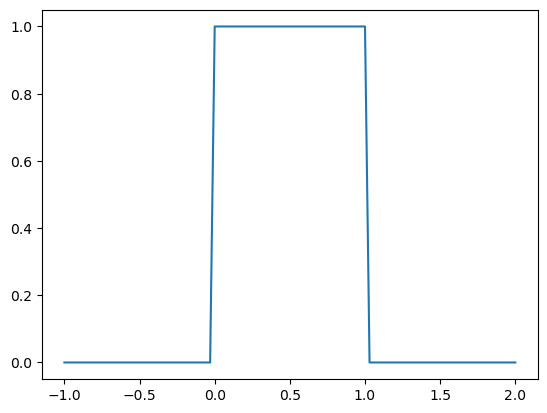

In [31]:
dist_unif = stats.uniform()
x = np.linspace(-1,2,100)
y = dist_unif.pdf(x)
plt.plot(x,y)
plt.show()

**Normal**
- Parámetros: $ \mu, \sigma^2 $
- Soporte: $ \mathbb{R} $ 
- PMF: $ f(x)=\Large{\frac{1}{\sigma\sqrt{2\pi}}} \large{e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}} $

In [32]:
mean, var, skew, kurt = stats.norm.stats(moments='mvsk')
print('Promedio:', mean)
print('Varianza:', var)
print('Skew:', skew)
print('Curtosis:', kurt)

Promedio: 0.0
Varianza: 1.0
Skew: 0.0
Curtosis: 0.0


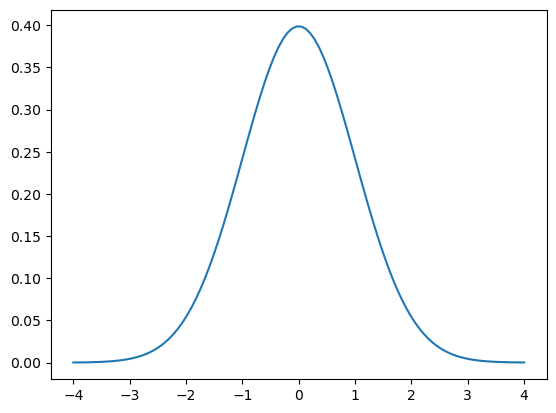

In [34]:
dist_unif = stats.norm()
x = np.linspace(-4,4,100)
y = dist_unif.pdf(x)
plt.plot(x,y)
plt.show()

**Ejercicios**  
- $ P(-1.5 < Z < 0)=? $ 
- $ P(Z<-1.5)=? $ 
- $ P(X>12)\;con\;X \sim \mathcal N(3,9)=? $ 
- Si el retorno de una acción $R$ se distribuye normalmente con un promedio diario de $ 8\%/252 $ y una varianza de $ (20\%)^2/252 $, encuentra los valores en los que:
- a. P(R<r) = 0.001
- b. P(R<r) = 0.01
- c. P(R<r) = 0.05

**Ejercicio Value at Risk (VaR)**  
El análisis de riesgo de una cartera de instrumentos tiene dos usos primordiales:
- Cuantificar el impacto que la variabilidad de esos factores de riesgo puede tener en el valor de la cartera.
- Analizar los flujos de la cartera, en el caso en el que ésta tenga como función suministrar flujos en fechas futuras para cubrir pasivos (financieros, actuariales).  


Los factores de riesgo que determinan las variaciones en el valor o en los
flujos de la cartera pueden ser de distintos tipos como:
- equity (precios de acciones, cotizaciones de índices, etc.); 
- tasas (curva cupón cero, factores de descuento, etc.); 
- crédito (ratings, spreads de crédito, etc.). 
- otras variables macroeconómicas que a su vez muevan factores anteriores: los tipos (por ejemplo, por control de inflación), el crédito (ciclo de crédito) o la propia bolsa (ciclo económico).  

A los factores anteriores nos referiremos como de **factores de riesgo**  

Por **riesgo de mercado** se entiende el riesgo de incurrir en pérdidas 
por el mantenimiento de posiciones en los mercados; 
como consecuencia de un movimiento adverso de factores de riesgo

Por otro lado, hablamos de **riesgo de crédito** cuando analizamos riesgos de contrapartida, realizamos análisis de capital económico, etc.  

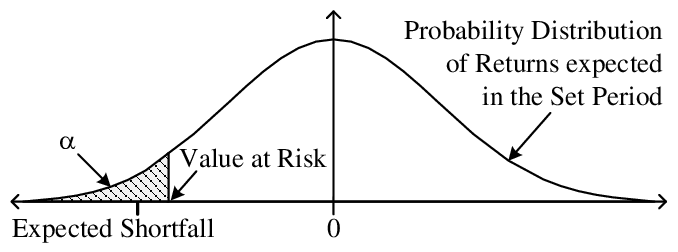

La medida de riesgo más usual es el Valor en Riesgo, **VaR**, iniciales de Value at Risk. El Var viene asociado a un horizonte temporal y un nivel de confianza
El VaRα es simplemente el percentil asociado al nivel de confianza 1 − α:  
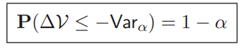
es decir, hay confianza de α de que la caída de valor no llegue a superar el nivel VaRα

**Ejercicio**  
1. Calcula el VaR **individual** de las acciones de Apple, Cemex, Evergrande, TSLA, y de las criptomoneda BTC. 

Cuando estamos analizando dos o más variables aleatorios el movimiento en conjunto de ambas variables se puede describir con dos métricas adicionales.  

**Covarianza**  
$ Cov(X_1, X_2) = \sigma_{12} = \int_1 \int_2 [x_1 - E(X_1)][x2-E(X_2)]f_{12}(x_1,x_2)dx_1dx_2 $  
En donde $ f_{12}(x_1,x_2) $ correspone a la función conjunta de dos variables independientes:  
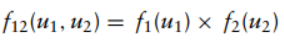

Usando un estimador para obtener la covarianza a partir de una muestra de datos tenemos que:  
$ \sigma_{{X_1}{X_2}} = \frac{1}{n}\sum (X_i-\mu_X)(Y_i - \mu_Y) $

**Correlación**  
Muchas veces es útil normalizar la covarianza en un número sin unidades, que está dado por el coeficiente de correlación Pearson que se obtiene con:  
$ \rho(X_1,X_2) = \large\frac{Cov(X_1, X_2)}{\sigma_1\sigma_2} $  
El cual es una medida de la dependencia lineal.  

**Ejercicio**  
2. Calcula el VaR de un portafolio con todos los assets anteriores en igual proporción. Considera que la desviación estandar del portafolio es igual a:  
$ \sigma_{port}= \sqrt{w_T\cdot \Sigma \cdot w}$

El **credit value adjustment (CVA)** de una cartera de posiciones (o de una única posición) con una contrapartida es el valor de mercado del riesgo de crédito asumido y que es debido al posible impago o insolvencia de esa contrapartida.  
- El CVA es necesario para la adecuada valoración a mercado de una posición.
- El CVA puede entenderse como la prima (a mercado) que habría que pagar a una tercera contrapartida sin riesgo de crédito para que asegure las pérdidas efectivas que la insolvencia de la contrapartida pueda suponer.
- El CVA puede entenderse como el ajuste que hay que hacer sobre la valoración media a mercado, en función de la verdadera calidad crediticia de la contrapartida.  

Como el CVA es un valor a mercado, el modelo de simulación, de evolución de las variables de mercado, tiene que ser un modelo de mercado y no un modelo de riesgos. Es decir, tiene que ser un **modelo libre de arbitraje** que esté calibrado a mercado. La  lección canónica aquí es el marco riesgo neutro y es el que vamos a usar.  

¿Cómo ponemos precio a este riesgo?  
$ Valor\:con\:riesgo = Valor\:sin\:riesgo - Valor\:de\:las\:pérdidas\:en\:caso\:de\:default\:(CVA) $  

¿Cómo lo calculamos?  
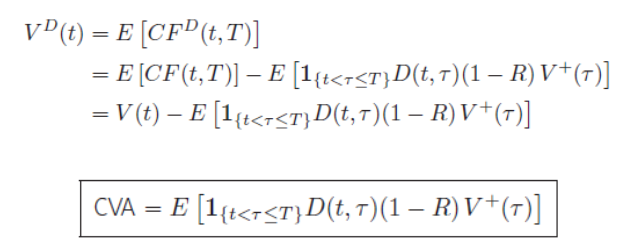

Hacemos las siguientes suposiciones:
- Tiempo discreto
- Probabilidad condicionada
- Tasa de recuperación constante
- Default de la contraparte independiente del valor del instrumento  

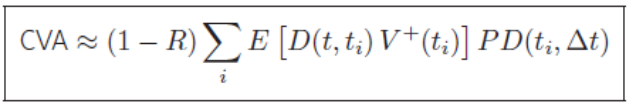

El valor de las pérdidas por default y por tanto el CVA quedaría:  
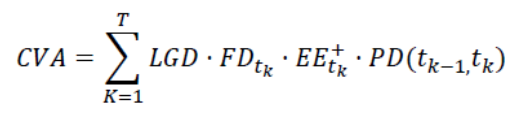

**Exposiciones**  
La exposición con una contrapartida es el máximo entre 0 y el valor de mercado de la cartera de posiciones con esa contrapartida.
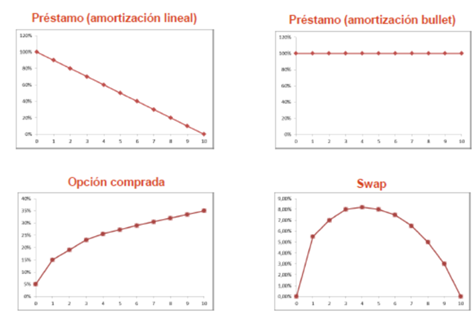  

**Forwards**  
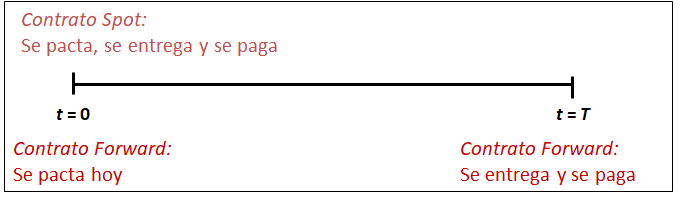

*FX Forward:*
- Se pacta al día de hoy el intercambio de monedas en una fecha futura.
- El tipo de cambio futuro se obtiene al sumar o restar los puntos forward al tipo de cambio spot.

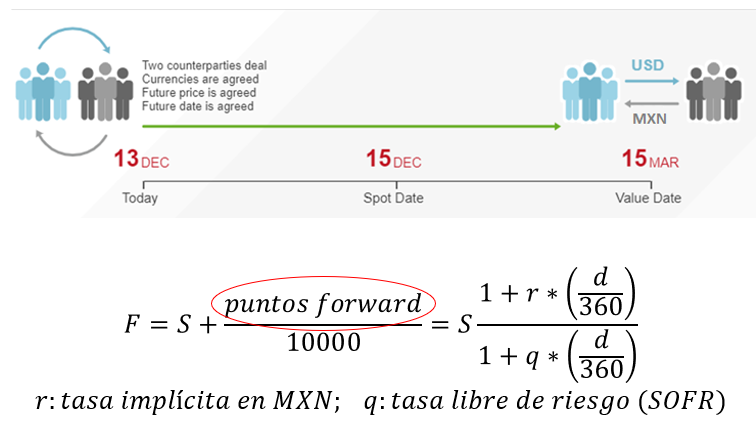

**Swaps**  
Un Swap es un acuerdo entre dos contrapartes para intercambiar flujos de efectivo en el futuro.
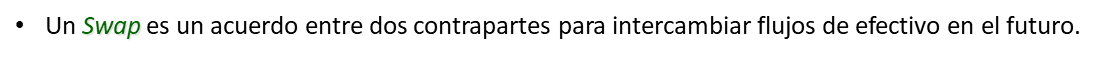
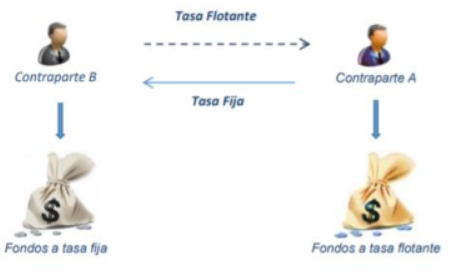
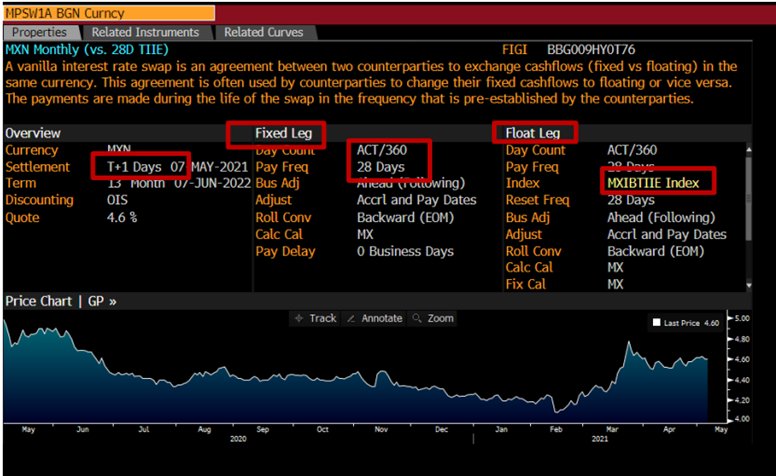

**Log Normal**

In [40]:
mean, var, skew, kurt = stats.lognorm.stats(0.9,moments='mvsk')
print('Promedio:', mean)
print('Varianza:', var)
print('Skew:', skew)
print('Curtosis:', kurt)

Promedio: 1.499302500056767
Varianza: 2.805182329887397
Skew: 4.7453296017972315
Curtosis: 57.410756857046074


**$\chi^2$**

In [42]:
mean, var, skew, kurt = stats.chi2.stats(10,moments='mvsk')
print('Promedio:', mean)
print('Varianza:', var)
print('Skew:', skew)
print('Curtosis:', kurt)

Promedio: 10.0
Varianza: 20.0
Skew: 0.8944271909999159
Curtosis: 1.2


**t Student**

In [43]:
mean, var, skew, kurt = stats.t.stats(3.4, moments='mvsk')
print('Promedio:', mean)
print('Varianza:', var)
print('Skew:', skew)
print('Curtosis:', kurt)

Promedio: 0.0
Varianza: 2.428571428571429
Skew: 0.0
Curtosis: inf


**F**

In [44]:
mean, var, skew, kurt = stats.f.stats(29, 18, moments='mvsk')
print('Promedio:', mean)
print('Varianza:', var)
print('Skew:', skew)
print('Curtosis:', kurt)

Promedio: 1.125
Varianza: 0.2805572660098522
Skew: 1.8065676503195025
Curtosis: 7.074636015325671


**Exponencial**

In [45]:
mean, var, skew, kurt = stats.expon.stats(s, moments='mvsk')
print('Promedio:', mean)
print('Varianza:', var)
print('Skew:', skew)
print('Curtosis:', kurt)

Promedio: 1.954
Varianza: 1.0
Skew: 2.0
Curtosis: 6.0


**Beta**

In [46]:
mean, var, skew, kurt = stats.beta.stats(2.31, 0.627, moments='mvsk')
print('Promedio:', mean)
print('Varianza:', var)
print('Skew:', skew)
print('Curtosis:', kurt)

Promedio: 0.7865168539325842
Varianza: 0.04264874077027537
Skew: -1.124071486322822
Curtosis: 0.5654574834055228
